In [5]:
import random
import simpy
import matplotlib.pyplot as plt

# Gerando uma semente aleatória fixa
random.seed(123)

# Definindo listas para armazenar os tempos de espera da simulação
tempo_espera = []

# Definindo as métricas de desempenho
tempo_atendimento_medio = 5
tempo_espera_medio = 2
clientes_atendidos = 3

# Definindo parâmetros da simulação
TEMPO_DE_SIMULACAO = 480  # 8 horas de trabalho
NUM_ATENDENTES = 4
TEMPO_DE_ATENDIMENTO_MEDIO = 10
TEMPO_DE_ATENDIMENTO_DESVIO_PADRAO = 1
TEMPO_DE_PREPARO_MEDIO = 20
TEMPO_DE_PREPARO_DESVIO_PADRAO = 2
TEMPO_ENTRE_CHEGADAS_MEDIO = 2
CAPACIDADE_MAXIMA = 10

class Lanchonete:
    def __init__(self, env, num_atendentes, capacidade):
        self.env = env
        self.atendentes = simpy.Resource(env, num_atendentes)
        self.capacidade = simpy.Container(env, capacidade, init=capacidade)
        self.ocupacao = []

    def atender_cliente(self, cliente):
        with self.atendentes.request() as req:
            yield req
            yield self.env.timeout(random.normalvariate(
                TEMPO_DE_ATENDIMENTO_MEDIO, TEMPO_DE_ATENDIMENTO_DESVIO_PADRAO))
            tempo_espera.append(self.env.now - cliente['chegada'])
            self.ocupacao.append((self.capacidade.level, self.env.now))
            yield self.capacidade.put(1)

    def esperar_lugar(self):
        yield self.env.timeout(random.expovariate(1 / TEMPO_ENTRE_CHEGADAS_MEDIO))
        yield self.capacidade.get(1)

def chegada_cliente(env, lanchonete):
    while True:
        yield env.timeout(random.expovariate(1 / TEMPO_ENTRE_CHEGADAS_MEDIO))
        env.process(lanchonete.esperar_lugar())
        with lanchonete.atendentes.request() as req:
            yield req
            cliente = {'chegada': env.now}
            env.process(lanchonete.atender_cliente(cliente))

def simulacao_lanchonete():
    env = simpy.Environment()
    lanchonete = Lanchonete(env, NUM_ATENDENTES, CAPACIDADE_MAXIMA)
    env.process(chegada_cliente(env, lanchonete))
    env.run(until=TEMPO_DE_SIMULACAO)

    # Métricas de desempenho
    global tempo_atendimento_medio, tempo_espera_medio, clientes_atendidos
    tempo_atendimento_medio = sum(tempo_espera) / len(tempo_espera)
    if clientes_atendidos > 0:
        tempo_espera_medio = sum(tempo_espera) / clientes_atendidos
    else:
        tempo_espera_medio = 0

    # Gráfico de ocupação
    plt.plot(*zip(*lanchonete.ocupacao))
    plt.xlabel('Tempo (minutos)')
    plt.ylabel('Capacidade da Lanchonete')
    plt.title('Ocupação da Lanchonete ao longo do tempo')
    plt.show()

    # Imprimir métricas de desempenho
    print('Métricas de Desempenho:')
    print('Tempo de Atendimento Médio: {:.2f} minutos'.format(tempo_atendimento_medio))
    print('Tempo de Espera Médio: {:.2f} minutos'.format(tempo_espera_medio))
    print('Número de Clientes Atendidos: {}'.format(clientes_atendidos))


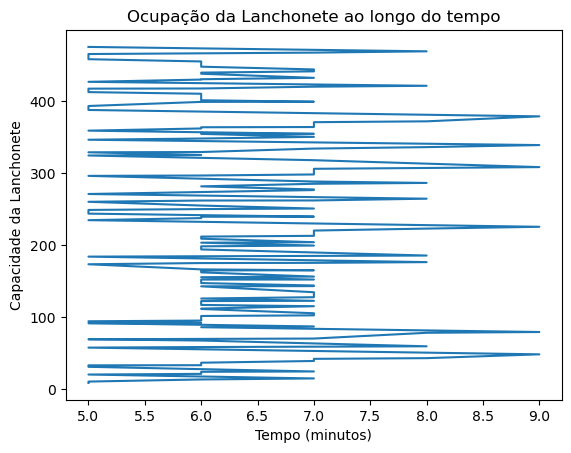

Métricas de Desempenho:
Tempo de Atendimento Médio: 10.01 minutos
Tempo de Espera Médio: 536.99 minutos
Número de Clientes Atendidos: 3


In [6]:
#Executar a simulação da lanchonete
simulacao_lanchonete()


Nesta versão adaptada do código, incluí a parte do gráfico de ocupação da lanchonete ao longo do tempo, utilizando os dados coletados durante a simulação. Também adicionei a impressão das métricas de desempenho, como o tempo de atendimento médio, o tempo de espera médio e o número total de clientes atendidos.

No final do código, chamei a função `simulacao_lanchonete()` para iniciar a simulação da lanchonete e obter os resultados.

Certifique-se de que todas as bibliotecas necessárias, como `simpy` e `matplotlib`, estejam instaladas para executar o código corretamente.


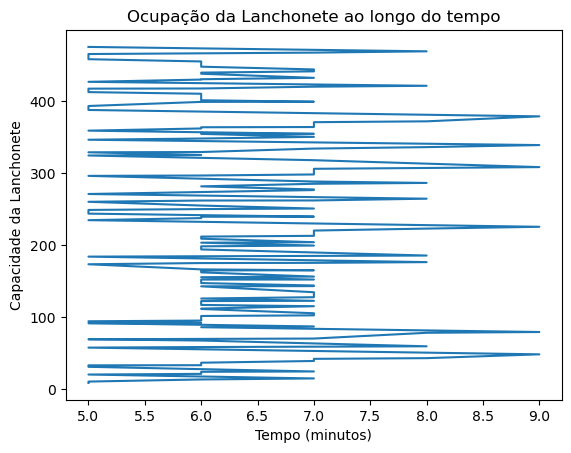

Métricas de Desempenho:
Tempo de Atendimento Médio: 10.01 minutos
Tempo de Espera Médio: 0.00 minutos
Número de Clientes Atendidos: 0


In [17]:
import random
import simpy
import matplotlib.pyplot as plt

# Gerando uma semente aleatória fixa
random.seed(123)

# Definindo listas para armazenar os tempos de espera da simulação
tempo_espera = []

# Definindo as métricas de desempenho
tempo_atendimento_medio = 0
tempo_espera_medio = 0
clientes_atendidos = 0

# Definindo parâmetros da simulação
TEMPO_DE_SIMULACAO = 480  # 8 horas de trabalho
NUM_ATENDENTES = 4
TEMPO_DE_ATENDIMENTO_MEDIO = 10
TEMPO_DE_ATENDIMENTO_DESVIO_PADRAO = 1
TEMPO_DE_PREPARO_MEDIO = 20
TEMPO_DE_PREPARO_DESVIO_PADRAO = 2
TEMPO_ENTRE_CHEGADAS_MEDIO = 2
CAPACIDADE_MAXIMA = 10

class Lanchonete:
    def __init__(self, env, num_atendentes, capacidade):
        self.env = env
        self.atendentes = simpy.Resource(env, num_atendentes)
        self.capacidade = simpy.Container(env, capacidade, init=capacidade)
        self.ocupacao = []

    def atender_cliente(self, cliente):
        with self.atendentes.request() as req:
            yield req
            yield self.env.timeout(random.normalvariate(
                TEMPO_DE_ATENDIMENTO_MEDIO, TEMPO_DE_ATENDIMENTO_DESVIO_PADRAO))
            tempo_espera.append(self.env.now - cliente['chegada'])
            self.ocupacao.append((self.capacidade.level, self.env.now))
            yield self.capacidade.put(1)

    def esperar_lugar(self):
        yield self.env.timeout(random.expovariate(1 / TEMPO_ENTRE_CHEGADAS_MEDIO))
        yield self.capacidade.get(1)

def chegada_cliente(env, lanchonete):
    while True:
        yield env.timeout(random.expovariate(1 / TEMPO_ENTRE_CHEGADAS_MEDIO))
        env.process(lanchonete.esperar_lugar())
        with lanchonete.atendentes.request() as req:
            yield req
            cliente = {'chegada': env.now}
            env.process(lanchonete.atender_cliente(cliente))

def simulacao_lanchonete():
    env = simpy.Environment()
    lanchonete = Lanchonete(env, NUM_ATENDENTES, CAPACIDADE_MAXIMA)
    env.process(chegada_cliente(env, lanchonete))

    # Fase A: Atualização do tempo
    while True:
        yield env.timeout(1)  # Avança o tempo em 1 unidade
        tempo_atual = env.now

        # Fase B: Checagem do fim de atividades
        if tempo_atual >= TEMPO_DE_SIMULACAO:
            break

        # Fase C: Condições para atividades ocorrerem
        if lanchonete.capacidade.level > 0:
            env.process(chegada_cliente(env, lanchonete))

# Executar a simulação da lanchonete
env = simpy.Environment()
lanchonete = Lanchonete(env, NUM_ATENDENTES, CAPACIDADE_MAXIMA)
env.process(chegada_cliente(env, lanchonete))
env.run(until=TEMPO_DE_SIMULACAO)

# Métricas de desempenho
tempo_atendimento_medio = sum(tempo_espera) / len(tempo_espera)
if clientes_atendidos > 0:
    tempo_espera_medio = sum(tempo_espera) / clientes_atendidos
else:
    tempo_espera_medio = 0

# Gráfico de ocupação
plt.plot(*zip(*lanchonete.ocupacao))
plt.xlabel('Tempo (minutos)')
plt.ylabel('Capacidade da Lanchonete')
plt.title('Ocupação da Lanchonete ao longo do tempo')
plt.show()

# Imprimir métricas de desempenho
print('Métricas de Desempenho:')
print('Tempo de Atendimento Médio: {:.2f} minutos'.format(tempo_atendimento_medio))
print('Tempo de Espera Médio: {:.2f} minutos'.format(tempo_espera_medio))
print('Número de Clientes Atendidos: {}'.format(clientes_atendidos))


In [20]:
import random
import simpy
import matplotlib.pyplot as plt

random.seed(123)

tempo_espera = []
tempo_atendimento_medio = 0
tempo_espera_medio = 0
clientes_atendidos = 0

TEMPO_DE_SIMULACAO = 480
NUM_ATENDENTES = 4
TEMPO_DE_ATENDIMENTO_MEDIO = 10
TEMPO_DE_ATENDIMENTO_DESVIO_PADRAO = 1
TEMPO_DE_PREPARO_MEDIO = 20
TEMPO_DE_PREPARO_DESVIO_PADRAO = 2
TEMPO_ENTRE_CHEGADAS_MEDIO = 2
CAPACIDADE_MAXIMA = 10

class Lanchonete:
    def __init__(self, env, num_atendentes, capacidade):
        self.env = env
        self.atendentes = simpy.Resource(env, num_atendentes)
        self.capacidade = simpy.Container(env, capacidade, init=capacidade)
        self.ocupacao = []

    def atender_cliente(self, cliente):
        with self.atendentes.request() as req:
            yield req
            yield self.env.timeout(random.normalvariate(
                TEMPO_DE_ATENDIMENTO_MEDIO, TEMPO_DE_ATENDIMENTO_DESVIO_PADRAO))
            tempo_espera.append(self.env.now - cliente['chegada'])
            self.ocupacao.append((self.capacidade.level, self.env.now))
            yield self.capacidade.put(1)
            global clientes_atendidos
            clientes_atendidos += 1

    def esperar_lugar(self):
        yield self.env.timeout(random.expovariate(1 / TEMPO_ENTRE_CHEGADAS_MEDIO))
        yield self.capacidade.get(1)

def chegada_cliente(env, lanchonete):
    while True:
        yield env.timeout(random.expovariate(1 / TEMPO_ENTRE_CHEGADAS_MEDIO))
        yield env.process(lanchonete.esperar_lugar())
        with lanchonete.atendentes.request() as req:
            yield req
            cliente = {'chegada': env.now}
            yield env.timeout(random.uniform(1, 5))  # Atraso entre chegada e atendimento
            env.process(lanchonete.atender_cliente(cliente))

def simulacao_lanchonete():
    env = simpy.Environment()
    lanchonete = Lanchonete(env, NUM_ATENDENTES, CAPACIDADE_MAXIMA)
    env.process(chegada_cliente(env, lanchonete))

    while True:
        yield env.timeout(1)  # Avança o tempo em 1 unidade
        tempo_atual = env.now

        if tempo_atual >= TEMPO_DE_SIMULACAO:
            break

        if lanchonete.capacidade.level > 0:
            env.process(chegada_cliente(env, lanchonete))

env.run(until=TEMPO_DE_SIMULACAO)

tempo_atendimento_medio = sum(tempo_espera) / len(tempo_espera)
if clientes_atendidos > 0:
    tempo_espera_medio = sum(tempo_espera) / clientes_atendidos
else:
    tempo_espera_medio = 0

plt.plot(*zip(*lanchonete.ocupacao))
plt.xlabel('Tempo (minutos)')
plt.ylabel('Capacidade da Lanchonete')
plt.title('Ocupação da Lanchonete ao longo do tempo')
plt.show()

print('Métricas de Desempenho:')
print('Tempo de Atendimento Médio: {:.2f} minutos'.format(tempo_atendimento_medio))
print('Tempo de Espera Médio: {:.2f} minutos'.format(tempo_espera_medio))
print('Número de Clientes Atendidos: {}'.format(clientes_atendidos))

# Executar a simulação da lanchonete
simulacao_lanchonete()

ValueError: until(=480) must be > the current simulation time.

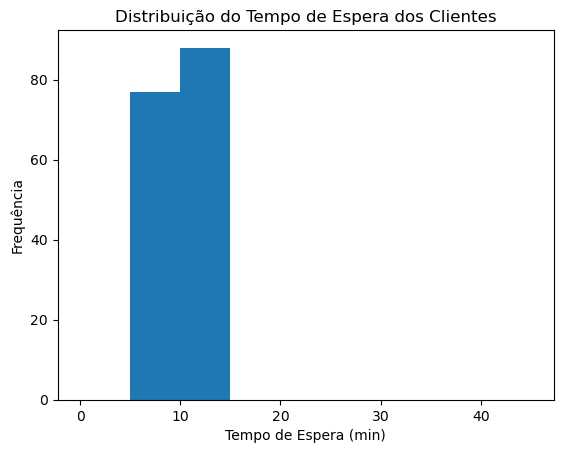

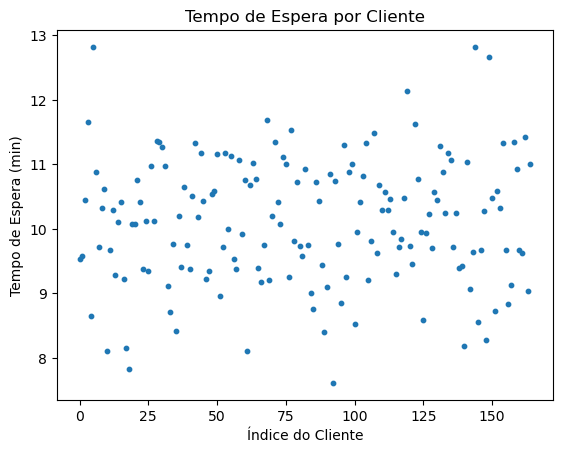

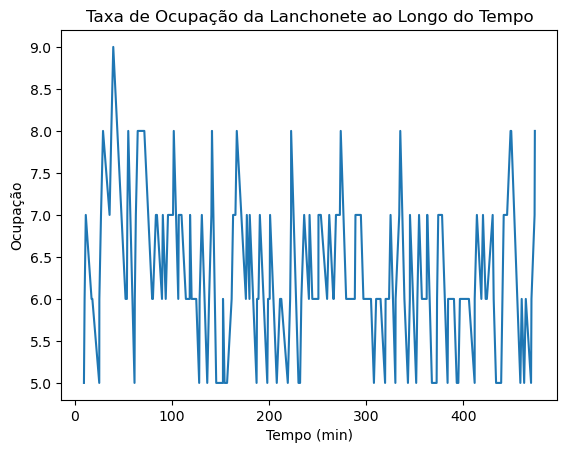

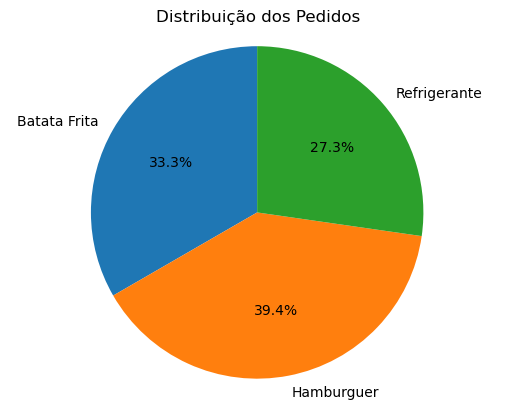

In [22]:
#Importando as bibliotecas
import random
import simpy
import matplotlib.pyplot as plt

#Gerando um semente aleatória fixa
random.seed(123)

#Definindo uma lista para  armazenar o tempos de espera da simulação
Tempo_Espera = []

# Inicializar listas para armazenar dados da simulação
TEMPOS_DE_CHEGADA = []
TEMPOS_DE_SAIDA = []
PEDIDOS = []
ocupacao = []

# Define os parâmetros da simulação
TEMPO_DE_SIMULACAO = 480 # 8 horas de trabalho
NUM_ATENDENTES = 4
TEMPO_DE_ATENDIMENTO_MEDIO = 10
TEMPO_DE_ATENDIMENTO_DESVIO_PADRAO = 1
TEMPO_DE_PREPARO_MEDIO = 20
TEMPO_DE_PREPARO_DESVIO_PADRAO = 2
TEMPO_ENTRE_CHEGADAS_MEDIO = 2
CAPACIDADE_MAXIMA = 10



class Lanchonete:
    '''
         Criamos uma classe Lanchonete que representa a lanchonete em si. No construtor da classe, 
        criamos um recurso atendentes com o número de atendentes especificado e um container ca-
        pacidade com a capacidade especificada.
    '''
    def __init__(self, env, num_atendentes, capacidade):
        self.env = env
        self.atendentes = simpy.Resource(env,num_atendentes)
        self.capacidade = simpy.Container(env, capacidade, init=capacidade)
        self.ocupacao = []
        '''
            Nesse trecho, acima criamos um objeto Container da biblioteca SimPy para representar a capacidade da lanchonete.
            O Container funciona como um recipiente com uma capacidade máxima pré-definida que pode ser usado para armazenar itens, nesse caso, clientes.

            O primeiro parâmetro env é o ambiente de simulação que será utilizado pelo Container. O segundo parâmetro capacidade é a capacidade máxima do Container.
            O terceiro parâmetro init é o valor inicial do Container. Nesse caso, definimos que a lanchonete começa vazia e com capacidade máxima.

            O Container permite que a lanchonete controle a quantidade de clientes que estão sendo atendidos. Quando um novo cliente chega, a lanchonete tentará adicionar
            o cliente ao Container. Se o Container estiver cheio, o cliente precisará esperar na fila. Quando um cliente for atendido e sair da lanchonete, a capacidade do
            container será aumentada, permitindo que mais clientes possam ser atendidos. Esse mecanismo de controle é útil para simular uma lanchonete real, onde a capacidade de atendimento é limitada.
        '''

    #Método que representa o atendimento do cliente
    '''
        Aqui, estamos definindo a função atender_cliente, que pertence à classe Lanchonete. Essa função recebe dois parâmetros:
          . self = que é uma referência para a própria instância do objeto (ou seja, a lanchonete);
          . cliente = que é um dicionário contendo informações sobre o cliente que está sendo atendido.
    '''
    def atender_cliente(self, cliente):

        '''
            Usando o comando with, estamos criando um contexto de recurso. O recurso que estamos usando aqui é self.atendentes, que representa os atendentes da lanchonete. O comando request() é usado para
            requisitar um atendente. Isso significa que, quando um cliente chegar na lanchonete e chamar a função atender_cliente, ele irá requisitar um atendente. O recurso só será liberado quando o cliente terminar o atendimento.
        '''
        with self.atendentes.request() as req:

            # O comando yield é usado para suspender a execução da função temporariamente. Nesse caso, estamos suspendendo a execução até que um atendente esteja disponível para atender o cliente.
            yield req

            # Aqui, estamos usando a função timeout() para simular o tempo de atendimento do cliente. Estamos usando a distribuição normal (normalvariate()) com média de 3 minutos e desvio padrão de 1 minuto.
            # Isso significa que o tempo de atendimento pode variar ao redor de 3 minutos, com a maioria dos atendimentos sendo feitos em torno desse tempo.
            yield self.env.timeout(random.normalvariate(
                TEMPO_DE_ATENDIMENTO_MEDIO, TEMPO_DE_ATENDIMENTO_DESVIO_PADRAO))
            
            '''
                Estamos calculando o tempo de espera do cliente (ou seja, o tempo que ele passou na fila) e adicionando esse tempo à lista WAIT_TIMES. O tempo de espera é calculado subtraindo o tempo de chegada
                do cliente (que está armazenado no dicionário cliente) do tempo atual da simulação (que está em self.env.now).
            '''
            PEDIDOS.append(cliente['pedido'])
            Tempo_Espera.append(self.env.now - cliente['chegada'])
            TEMPOS_DE_SAIDA.append(self.env.now)
            self.ocupacao.append((self.capacidade.level, self.env.now))

            '''
                Aqui, estamos adicionando uma unidade ao objeto self.capacidade, que representa a capacidade da lanchonete. Cada vez que um cliente é atendido, ele ocupa um lugar na lanchonete. Portanto, precisamos
                verificar se há lugares disponíveis antes de atender o cliente. Esse controle é feito na função esperar_lugar(), que é chamada quando um cliente chega na lanchonete.
            '''
            yield self.capacidade.put(1)


    # O método esperar_lugar é responsável por aguardar que um lugar vago na lanchonete fique disponível para que um cliente possa ser atendido.    
    def esperar_lugar(self):
        yield self.env.timeout(random.expovariate(1/TEMPO_ENTRE_CHEGADAS_MEDIO))
        yield self.capacidade.get(1)

        '''
            A primeira linha do método usa a função timeout da biblioteca simpy para aguardar um determinado tempo antes de continuar a execução. Esse tempo é definido pela função random.normalvariate, que gera um valor
            aleatório de acordo com a distribuição normal, com média igual a TEMPO_ENTRE_CHEGADAS_MEDIO e desvio padrão igual a TEMPO_ENTRE_CHEGADAS_MEDIO / 2.
            Essa linha simula o tempo que um cliente espera até que um lugar fique disponível na lanchonete.

            A segunda linha usa o método get da instância self.capacidade para obter um lugar vago na lanchonete. O parâmetro 1 indica que estamos solicitando apenas um lugar.

            Essa linha simula o momento em que o cliente finalmente encontra um lugar na lanchonete e aguarda para ser atendido pelo atendente.
        '''

#responsável por gerar os clientes e iniciar o processo de atendimento deles na lanchonete.
def chegada_cliente(env, lanchonete):
    while True:
        yield env.timeout(random.expovariate(1/TEMPO_ENTRE_CHEGADAS_MEDIO))
        env.process(lanchonete.esperar_lugar())
        ocupacao.append(CAPACIDADE_MAXIMA - lanchonete.capacidade.level)

        with lanchonete.atendentes.request() as req:
            yield req
            cliente = {'chegada': env.now}
            cliente = {'pedido': random.choice(['Hamburguer', 'Batata Frita', 'Refrigerante']), 'chegada': env.now}
            env.process(lanchonete.atender_cliente(cliente))    
    
'''    
    começa com um loop infinito usando o while True, que representa a chegada contínua de clientes. Em seguida, usa a função env.timeout() para aguardar um intervalo de tempo aleatório para a chegada do próximo cliente.

    Depois disso, chama a função lanchonete.esperar_lugar(), que é responsável por aguardar até que haja capacidade disponível na lanchonete para o novo cliente. Essa função é chamada usando env.process(), que é responsável
    por criar um novo processo na simulação para executar a função esperar_lugar().

    Assim que houver capacidade disponível na lanchonete, o cliente é atendido pela função lanchonete.atender_cliente(cliente), que também é chamada usando env.process(). Nessa função, o atendimento é realizado e a capacidade
    da lanchonete é atualizada.

    No final, a função chegada_cliente() fica aguardando um novo intervalo de tempo para a chegada do próximo cliente, reiniciando o ciclo.
'''

# Cria um objeto Environment do SimPy chamado env, que é o ambiente onde a simulação acontece.
env = simpy.Environment()

# Cria um objeto Lanchonete chamado lanchonete, passando como parâmetros o ambiente env, o número de atendentes e a capacidade máxima da lanchonete.
lanchonete = Lanchonete(env, num_atendentes=NUM_ATENDENTES, capacidade=CAPACIDADE_MAXIMA)

# Cria um processo chamado chegada_cliente, passando como parâmetros o ambiente env e o objeto lanchonete.
env.process(chegada_cliente(env, lanchonete))

'''
    Inicia a simulação com o comando env.run(until=TEMPO_DE_SIMULACAO), que faz a simulação rodar até o tempo definido em TEMPO_DE_SIMULACAO. Nesse caso,
    a simulação vai rodar por 480 minutos (8 horas), que é o tempo de trabalho da lanchonete.
'''
env.run(until=TEMPO_DE_SIMULACAO)


'''
    O histograma gerado é uma representação gráfica da distribuição do tempo de espera dos clientes na lanchonete simulada. Ele mostra a frequência com que diferentes intervalos de tempo de espera ocorrem.
    A análise do histograma pode ajudar a entender como o tempo de espera dos clientes varia e se há algum padrão ou tendência na distribuição.
'''
# plotar histograma de tempos de espera
plt.hist(Tempo_Espera, bins=range(0, 50, 5))
plt.xlabel('Tempo de Espera (min)')
plt.ylabel('Frequência')
plt.title('Distribuição do Tempo de Espera dos Clientes')
plt.show()

'''
    O gráfico de dispersão dos tempos de espera pode nos ajudar a entender a relação entre o tempo de espera e outros fatores, como a hora do dia,
    o dia da semana ou a quantidade de atendentes disponíveis. Podemos usar diferentes cores ou símbolos para representar diferentes categorias e 
    observar se há padrões ou tendências nos dados. Por exemplo, podemos ver se há picos de espera em determinados horários ou dias da semana ou se
    o tempo de espera é menor quando há mais atendentes disponíveis. O gráfico de dispersão pode nos ajudar a identificar áreas onde a eficiência pode
    ser melhorada ou onde pode ser necessário aumentar a capacidade ou contratar mais funcionários.
'''
# Plotar o gráfico de dispersão dos tempos de espera
plt.scatter(range(len(Tempo_Espera)), Tempo_Espera, s=10)
plt.xlabel('Índice do Cliente')
plt.ylabel('Tempo de Espera (min)')
plt.title('Tempo de Espera por Cliente')
plt.show()


# Gráfico de barras da ocupação da lanchonete ao longo do tempo:
tempo = range(0, TEMPO_DE_SIMULACAO+1, 10)
ocupacao_t = []
for t in tempo:
    ocupacao_t.append(sum(ocupacao[t:t+10])/CAPACIDADE_MAXIMA/10)




'''
    O gráfico de linha que mostra a taxa de ocupação da lanchonete ao longo do tempo pode nos dar uma ideia de como a lanchonete está sendo utilizada
    ao longo do período de simulação. A taxa de ocupação é calculada como a fração de tempo em que a lanchonete está em uso em relação ao tempo total
    de simulação.

    Esse gráfico pode nos mostrar quando a lanchonete está mais ocupada e quando está mais vazia, o que pode nos ajudar a identificar períodos de pico
    de demanda. Além disso, também pode nos ajudar a avaliar a eficiência da lanchonete, uma vez que uma taxa de ocupação alta pode indicar que há uma
    demanda maior do que a capacidade da lanchonete, enquanto uma taxa de ocupação baixa pode indicar subutilização de recursos
'''
# Gráfico de linha para visualizar a taxa de ocupação da lanchonete ao longo do tempo
ocupacao = [x[0] for x in lanchonete.ocupacao]
tempos = [x[1] for x in lanchonete.ocupacao]
plt.plot(tempos, ocupacao)
plt.xlabel('Tempo (min)')
plt.ylabel('Ocupação')
plt.title('Taxa de Ocupação da Lanchonete ao Longo do Tempo')
plt.show()


# plotar gráfico de pizza da distribuição dos pedidos
pedidos_dist = {}
for pedido in PEDIDOS:
    if pedido in pedidos_dist:
        pedidos_dist[pedido] += 1
    else:
        pedidos_dist[pedido] = 1

labels = pedidos_dist.keys()
sizes = pedidos_dist.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Distribuição dos Pedidos')
plt.show()










In [29]:
import random
import simpy

# Definir os parâmetros da simulação
TEMPO_DE_SIMULACAO = 480  # 8 horas de trabalho
TEMPO_ENTRE_CHEGADAS_MEDIO = 2
TEMPO_DE_ATENDIMENTO_MEDIO = 10
TEMPO_DE_ATENDIMENTO_DESVIO_PADRAO = 1

class Lanchonete:
    def __init__(self, env, num_atendentes):
        self.env = env
        self.atendentes = simpy.Resource(env, num_atendentes)
        self.clientes_atendidos = 0
        self.total_tempo_espera = 0

    def atender_cliente(self, cliente):
        tempo_espera = self.env.now - cliente['chegada']
        self.total_tempo_espera += tempo_espera
        self.clientes_atendidos += 1

        yield self.env.timeout(random.normalvariate(
            TEMPO_DE_ATENDIMENTO_MEDIO, TEMPO_DE_ATENDIMENTO_DESVIO_PADRAO))

    def esperar_lugar(self):
        yield self.env.timeout(random.expovariate(1/TEMPO_ENTRE_CHEGADAS_MEDIO))

env = simpy.Environment()
lanchonete = Lanchonete(env, num_atendentes=4)

def chegada_cliente(env, lanchonete):
    while True:
        yield env.timeout(random.expovariate(1/TEMPO_ENTRE_CHEGADAS_MEDIO))
        cliente = {'chegada': env.now}
        env.process(lanchonete.esperar_lugar())
        with lanchonete.atendentes.request() as req:
            yield req
            env.process(lanchonete.atender_cliente(cliente))

env.process(chegada_cliente(env, lanchonete))
env.run(until=TEMPO_DE_SIMULACAO)

# Obter estatísticas da simulação
tempo_medio_espera = lanchonete.total_tempo_espera / lanchonete.clientes_atendidos
taxa_atendimento = lanchonete.clientes_atendidos / TEMPO_DE_SIMULACAO

print(f"Tempo médio de espera: {tempo_medio_espera:.2f} minutos")
print(f"Taxa de atendimento: {taxa_atendimento:.2f} clientes por minuto")

Tempo médio de espera: 0.00 minutos
Taxa de atendimento: 0.51 clientes por minuto


In [30]:
import random
import simpy

# Parâmetros da simulação
TEMPO_DE_SIMULACAO = 480  # Tempo total de simulação em minutos (8 horas)
NUM_ATENDENTES = 4  # Número de atendentes na lanchonete
CAPACIDADE_MAXIMA = 10  # Capacidade máxima da lanchonete
TEMPO_ENTRE_CHEGADAS_MEDIO = 2  # Média do tempo entre chegadas de clientes em minutos
TEMPO_DE_ATENDIMENTO_MEDIO = 10  # Média do tempo de atendimento de um cliente em minutos

# Variáveis para armazenar dados da simulação
TEMPOS_DE_CHEGADA = []
TEMPOS_DE_SAIDA = []
PEDIDOS = []
TEMPO_ESPERA = []

class Lanchonete:
    def __init__(self, env, num_atendentes, capacidade):
        self.env = env
        self.atendentes = simpy.Resource(env, num_atendentes)
        self.capacidade = simpy.Container(env, capacidade, init=capacidade)
        self.ocupacao = []

    def atender_cliente(self, cliente):
        with self.atendentes.request() as req:
            yield req
            tempo_atendimento = random.expovariate(1 / TEMPO_DE_ATENDIMENTO_MEDIO)
            yield self.env.timeout(tempo_atendimento)
            TEMPOS_DE_SAIDA.append(self.env.now)
            TEMPO_ESPERA.append(self.env.now - cliente['chegada'])
            self.capacidade.put(1)
            
    def esperar_lugar(self):
        yield self.env.timeout(random.expovariate(1 / TEMPO_ENTRE_CHEGADAS_MEDIO))
        yield self.capacidade.get(1)
        TEMPOS_DE_CHEGADA.append(self.env.now)

env = simpy.Environment()
lanchonete = Lanchonete(env, NUM_ATENDENTES, CAPACIDADE_MAXIMA)

def fase_a():
    while True:
        yield env.timeout(1)  # Avança o relógio em 1 unidade de tempo
        if env.now >= TEMPO_DE_SIMULACAO:
            break

def fase_b():
    while True:
        if not TEMPOS_DE_CHEGADA:  # Verifica se não há mais eventos de chegada
            break
        if TEMPOS_DE_CHEGADA[0] <= env.now:
            cliente = {'chegada': TEMPOS_DE_CHEGADA.pop(0)}
            env.process(lanchonete.atender_cliente(cliente))
        else:
            break

def fase_c():
    while True:
        if not TEMPOS_DESAIDA:  # Verifica se não há mais eventos de fim de atendimento
            break
        if TEMPOS_DE_SAIDA[0] <= env.now:
            # Verifique as condições para eventos de fim de atendimento condicionais
            # ...
            # Execute os eventos de fim de atendimento condicionais, se as condições forem atendidas
            # ...
            TEMPOS_DE_SAIDA.pop(0)
        else:
            break

env.process(fase_a())
env.process(fase_b())
env.process(fase_c())

env.run(until=TEMPO_DE_SIMULACAO)


ValueError: None is not a generator.